### Name : Lilian Stephanos Younan

### ID : 20200404

### LAB : S5

## 1. Importing important libraries :

In [1]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

# **Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

## Steps of my solution to making the linear regression model using gradient descent from scretch :

**Step 1:** Set Learning Rate & Number of Iterations, Initiate Random weight and bias value. y 

**Step 2:** Build Linear Regression Equation. (y = wx + b)

**Step 3:** Find the "y pred" value for given x value for the corresponding weight & bias.

**Step 4:** Check the loss function for these parameter values. ( difference between "y pred" & “true y")

**Step 5:** Update the parameter values using Gradient Descent. (new weight & bias value)

**Step 6:** Step 3, 4, 5 are repeated till we get minimum loss function

Finally we will get the best model (best weight and bias value) as it has minimum loss function.


In [2]:
class Linear_Regression():
    # just setters for the object of class Linear_Regression
    # Learning rate (λ) :  is one such hyper-parameter
    # that defines the adjustment in the weights of our network with respect to the loss gradient descent.
    # It determines how fast or slow we will move towards the optimal weights.

    # no_of_iterations : how  many the model will go throw the data to get the minimum loss (error)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # For all possible lines,
    # calculate the sum of squares of errors.
    # The line which has the least sum of squares of errors is the best fit line
    def fit(self, X, Y):
        self.m  , self.n = X.shape  ## number of rows

        # just initializing the weights for every feature in my dataset (becouse the prediction my be based on not only one feature)
        # so it may be multilinear regression

        # initiating the weight and bias

        self.w=np.zeros(self.n)

        # initializing the based to zero
        self.b = 0

        self.X = X

        self.Y = Y

        # implementing Gradient Descent for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()
            
        return self 

    # function to update weights in gradient descent

    def update_weights(self):
        # geting the y hat (Y_prediction) acording to the last w(weight) and b(bais)
        Y_prediction = self.predict(self.X)

        # calculate gradients
        ## dw will help to get newest w acording to learning rate in the next iteration
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

        ## dw will help to get newest b acording to learning rate in the next iteration
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # updating the weights and bais acording to learning rate for the next iteration
        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db
        return self
    
    
    # Line function for prediction:
    def predict(self, X):
        ## y = wX + b (as w is the slop of line (weight) , b is the intersection with line)
        return X.dot(self.w) + self.b


### (1) generating x and get Y values from equation :


In [3]:
x = np.arange(200)
delta = np.random.uniform(-50 , 30 , size = (200 ,))

### (2) converting the numpy arraies into series to make  dataframe 

In [4]:
ser_x = pd.Series(x , name = "X_VALUE")
ser_delta =  pd.Series(delta)
ser_x

0        0
1        1
2        2
3        3
4        4
      ... 
195    195
196    196
197    197
198    198
199    199
Name: X_VALUE, Length: 200, dtype: int32

In [5]:
y = ((0.4*ser_x) + 3 + ser_delta)
ser_y = pd.Series(y ,  name = "Y_VALUE")
ser_y

0       17.911239
1      -16.589178
2        3.964603
3        6.672165
4      -17.166847
          ...    
195     74.317671
196    104.658098
197     72.771239
198     57.856467
199     89.545014
Name: Y_VALUE, Length: 200, dtype: float64

In [6]:
df =pd.concat([ser_x , ser_y ],axis=1)
df

,X_VALUE,Y_VALUE
0,0,17.911239
1,1,-16.589178
2,2,3.964603
3,3,6.672165
4,4,-17.166847
...,...,...
195,195,74.317671
196,196,104.658098
197,197,72.771239
198,198,57.856467


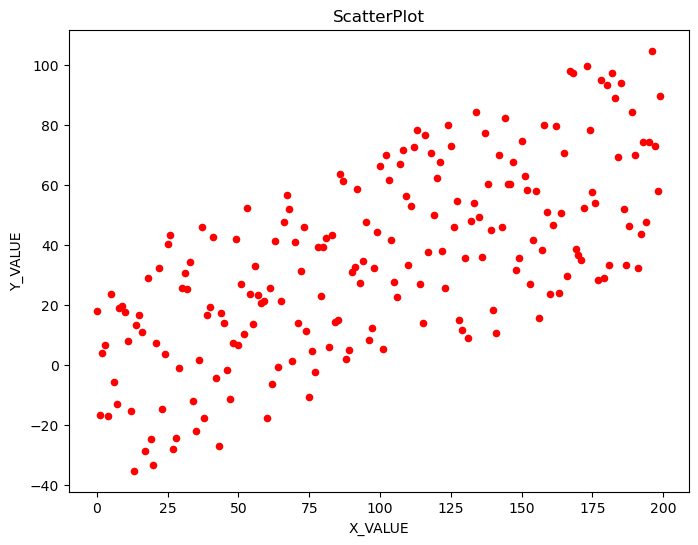

In [7]:
df.plot(kind = "scatter" , x = "X_VALUE" , y = "Y_VALUE", figsize = (8,6) , color = "red")
# set the title
plt.title('ScatterPlot')
  
# show the plot
plt.show()

In [8]:
# sperating X (training data ) from y (target data)
X_data = df.iloc[:,:-1].values      
y_data = df.iloc[:,1].values

## Splitting the dataset into training & test data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data , test_size=0.20, random_state = 42)

In [10]:
model = Linear_Regression(learning_rate = 0.00001 , no_of_iterations = 1000)

In [11]:
model.fit(X_train, Y_train)

In [12]:
# printing the parameter values ( weights & bias)
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  0.35253547528771495
bias =  -0.010060395277062463


*Predict* the X value for test data

In [13]:
test_data_prediction = model.predict(X_test)

In [14]:
print(test_data_prediction)

[33.48080976  5.27797173 10.56600386 55.6905447  45.11448044 40.53151926
 24.3148874  59.9209704  61.3311123  15.85403599 23.25728097 64.15139611
 58.15829303 27.48770668 65.56153801 62.38871873 19.73192622 53.57533185
 28.89784858 23.96235192 43.70433854  5.63050721 52.16518995 32.77573881
 22.9047455  21.14206812 29.60291953 23.60981645 44.05687402 46.52462234
  3.16275888  6.33557816 19.37939075 26.43010025 52.8702609  36.65362903
 47.58222877 48.28729972 57.80575755 26.78263573]


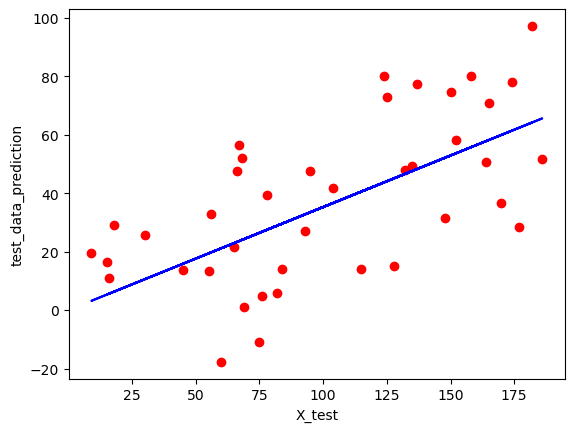

In [15]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('X_test')
plt.ylabel('test_data_prediction')
plt.show()

### MSE "Calculating Mean Squared Error" : 

In [16]:
summation = 0  #variable to store the summation of differences
n = len(Y_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
    difference = Y_test[i] - test_data_prediction[i]  #finding the difference between observed and predicted value
    squared_difference = difference**2  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average

print( "The Mean Square Error is: " , MSE)

The Mean Square Error is:  462.3652797905349
